In [20]:
import re
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

In [21]:
def get_words_list(text):
    return [x.lower() for x in re.findall(r'[a-zA-Z0-9_\(\)\|]+', text)]


def get_words_list_from_file(fileName):
    with open(fileName, 'r') as file:
        data = file.read().replace('\n', ' ')

    return get_words_list(data)


def get_unique_words_list(words_list):
    return sorted(list(set(words_list)), key=str.lower)


def create_bipartite_graph(words_list):
    bi_graph = nx.Graph()
    # Add nodes with the node attribute "bipartite". Append 0 and 1 to differentiate between the two sets of nodes.
    unique_words_list = get_unique_words_list(words_list)
    bi_graph.add_nodes_from([word + "_0" for word in unique_words_list], bipartite=0)
    bi_graph.add_nodes_from([word + "_1" for word in unique_words_list], bipartite=1)

    for i in range(len(words_list)):
        if i >= 2:
            # check 2 neighbours before
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i - 2] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i - 2] + "_1", weight=1)
        if i >= 1:
            # check 1 neighbour before
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i - 1] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i - 1] + "_1", weight=1)
        if i < len(words_list) - 1:
            # check 1 neighbour after
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i + 1] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i + 1] + "_1", weight=1)
        if i < len(words_list) - 2:
            # check 2 neighbours after
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i + 2] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i + 2] + "_1", weight=1)

    return bi_graph


def draw_bipartite_graph(graph):
    X, Y = bipartite.sets(graph)
    pos = dict()
    pos.update((n, (1, i)) for i, n in enumerate(X))  # put nodes from X at x=1
    pos.update((n, (2, i)) for i, n in enumerate(Y))  # put nodes from Y at x=2
    nx.draw(graph, pos=pos, with_labels=True, node_color=['blue' if node.endswith("_0") else 'green' for node in graph])
    plt.show()


def get_count_of_edges_for_words(graph):
    words = {}
    for node in graph:
        if node.endswith("_0"):
            words[node[:-2]] = 0
            for neighbour in graph[node]:
                words[node[:-2]] += graph[node][neighbour]['weight']
    return dict(sorted(words.items(), key=lambda item: item[1], reverse=True))


def get_graph(filename):
    text_words = get_words_list_from_file(filename)
    words_graph = create_bipartite_graph(text_words)
    return words_graph



# Functions to get stats
def get_top_n_words(filename, n):
    words_graph = get_graph(filename)
    words_count = get_count_of_edges_for_words(words_graph)
    return list(words_count.keys())[:n]

def get_top_n_words_with_weights(filename, n):
    words_graph = get_graph(filename)
    words_count = get_count_of_edges_for_words(words_graph)
    return list(words_count.items())[:n]

def get_top_n_words_with_weights_as_dict(filename, n):
    words_graph = get_graph(filename)
    words_count = get_count_of_edges_for_words(words_graph)
    return dict(list(words_count.items())[:n])

In [22]:
graph_sample = get_graph("../../resources/sample.txt")
graph_voynich = get_graph("../../resources/voynich.txt")
graph_spanish_wiki = get_graph("../../resources/spanish_wiki.txt")

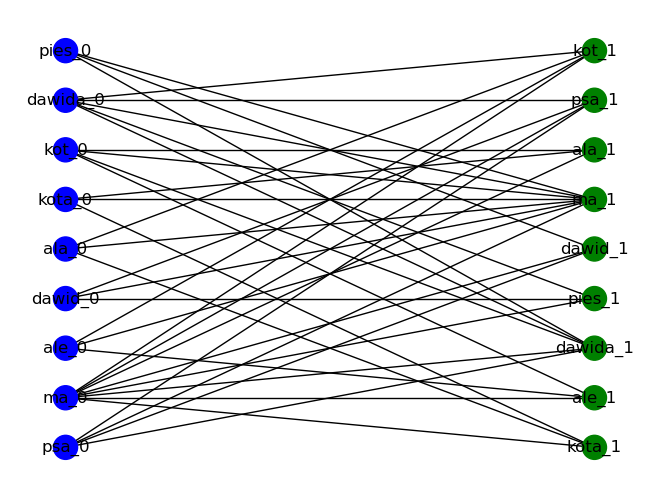

In [23]:
draw_bipartite_graph(graph_sample)

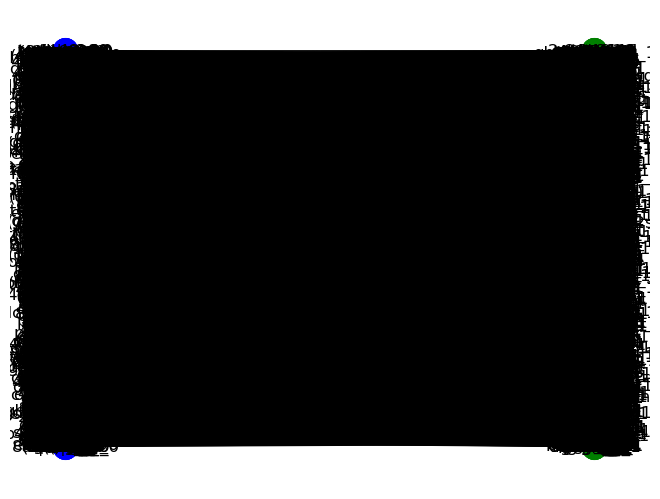

In [24]:
draw_bipartite_graph(graph_voynich)

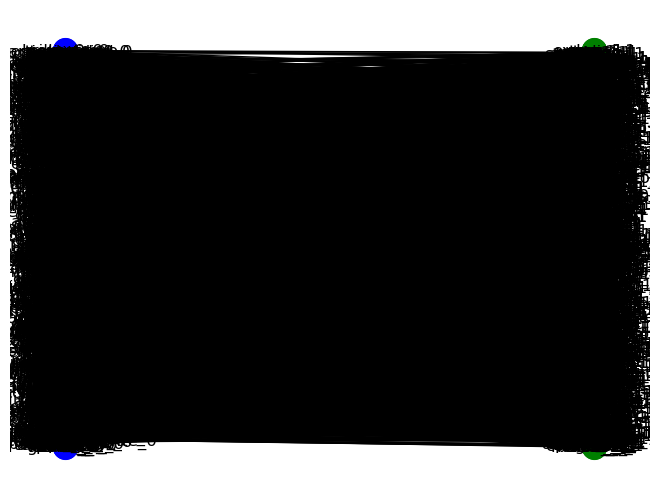

In [25]:
draw_bipartite_graph(graph_spanish_wiki)

In [26]:
print(get_count_of_edges_for_words(words_graph))

{'ma': 8, 'dawida': 5, 'kot': 4, 'psa': 4, 'ala': 3, 'ale': 3, 'dawid': 3, 'kota': 3, 'pies': 3}


In [27]:
print(get_top_n_words("../../resources/sample.txt", 10))

['ma', 'dawida', 'kot', 'psa', 'ala', 'ale', 'dawid', 'kota', 'pies']


In [28]:
print(get_top_n_words_with_weights_as_dict("../../resources/sample.txt", 10))

{'ma': 8, 'dawida': 5, 'kot': 4, 'psa': 4, 'ala': 3, 'ale': 3, 'dawid': 3, 'kota': 3, 'pies': 3}


In [29]:
# Top 10 words in sample.txt
top_10_sample = get_top_n_words_with_weights_as_dict("../../resources/sample.txt", 10)

# Top 10 words in voynich.txt
top_10_voynich = get_top_n_words_with_weights_as_dict("../../resources/voynich.txt", 10)

# Top 10 words in spanish_wiki.txt
top_10_spanish_wiki = get_top_n_words_with_weights_as_dict("../../resources/spanish_wiki.txt", 10)

In [30]:
print(top_10_sample)
print(top_10_voynich)
print(top_10_spanish_wiki)

{'ma': 8, 'dawida': 5, 'kot': 4, 'psa': 4, 'ala': 3, 'ale': 3, 'dawid': 3, 'kota': 3, 'pies': 3}
{'8am': 857, 'toe': 427, 'tor': 356, '8g': 310, '8ar': 306, 'soe': 285, 'tg': 259, '8ae': 246, 'or': 241, 'hzg': 233}
{'de': 407, 'el': 310, 'a': 285, 'la': 282, 'y': 237, 'en': 234, 'que': 228, 'n': 221, 'los': 182, 'se': 170}
